In [1]:
import numpy as np


def generate_data(n):
    # prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1, 1))
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1, 2) + np.random.standard_normal((n1, 1))
    y_1 = np.zeros([n1, 1])
    temp1 = np.concatenate((x1_1, x2_1, y_1), axis=1)

    # druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0, 10), [[0.8, 0], [0, 1.2]], n2)
    y_2 = np.ones([n2, 1])
    temp2 = np.concatenate((x_2, y_2), axis=1)

    data = np.concatenate((temp1, temp2), axis=0)

    # permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices, :]

    return data


np.random.seed(242)
x1 = generate_data(200)
np.random.seed(12)
x2 = generate_data(100)

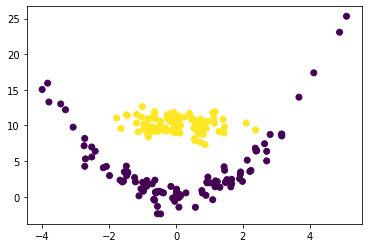

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x1[:,0], x1[:,1], c=x1[:,2])
plt.show()

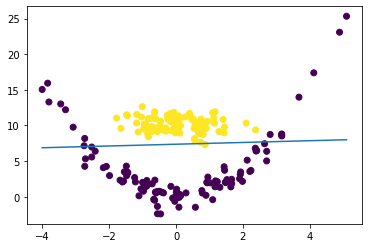

In [3]:
import sklearn
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x1[:, 0:2], x1[:, 2])

xp = np.array([x1[:, 0].min(), x1[:, 0].max()])
yp1 = -logReg.coef_[0][0]/logReg.coef_[0][1] * xp[0] - logReg.intercept_[0]/logReg.coef_[0][1]
yp2 = -logReg.coef_[0][0]/logReg.coef_[0][1] * xp[1] - logReg.intercept_[0]/logReg.coef_[0][1]
yp = np.array([yp1,yp2])

plt.scatter(x1[:,0],x1[:,1],c=x1[:,2])
plt.plot(xp,yp)

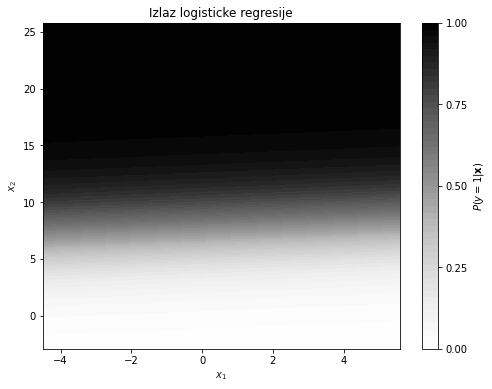

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(x1[:,0])-0.5:max(x1[:,0])+0.5:.05,
 min(x1[:,1])-0.5:max(x1[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logReg.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


Text(0, 0.5, 'x2')

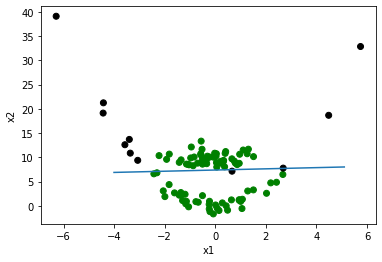

In [5]:
from matplotlib.colors import LinearSegmentedColormap

predictions = logReg.predict(x2[:, 0:2])

plt.scatter(x2[:,0], x2[:,1], c = x2[:,2] == predictions, cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'green']))
plt.plot(xp, yp)
plt.xlabel('x1')
plt.ylabel('x2')

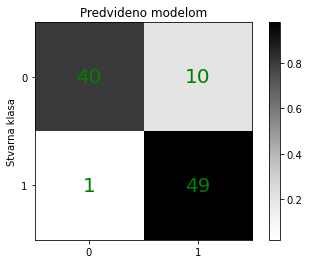

Accuracy: 0.89
Missclasification rate: 0.10999999999999999
Precision: 0.8305084745762712
Recall: 0.98
Specificity: 0.8
0.875


In [6]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


matrix = confusion_matrix(x2[:, 2], predictions)
plot_confusion_matrix(matrix)
tn, fp, fn, tp = confusion_matrix(x2[:, 2], predictions).ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)
missclasification_rate = 1 - accuracy
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)

print('Accuracy:', str(accuracy))
print('Missclasification rate:', str(missclasification_rate))
print('Precision:', str(precision))
print('Recall:', str(recall))
print('Specificity:', str(specificity))


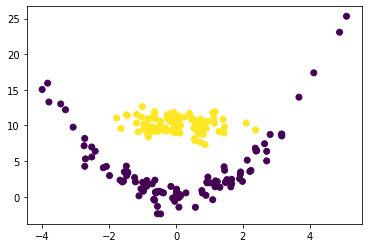

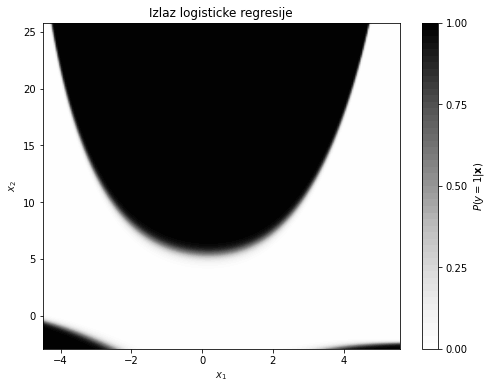

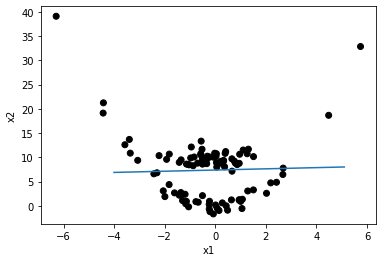

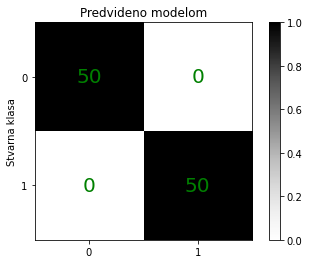

Accuracy: 1.0
Missclasification rate: 0.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias = False)
data_train_new = poly.fit_transform(x1[:,0:2])

plt.figure()
plt.scatter(x1[:,0], x1[:,1], c=x1[:,2])


#--------------3----------------
modelNew = LogisticRegression(max_iter = 500)
modelNew.fit(data_train_new, x1[:,2])


param = list(modelNew.coef_[0])
param.append(modelNew.intercept_[0])

plt.show()


#--------------4---------------

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(x1[:,0])-0.5:max(x1[:,0])+0.5:.05,
                          min(x1[:,1])-0.5:max(x1[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid = poly.fit_transform(grid)
probs = modelNew.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()
#--------------5-------------

data_test_new = poly.fit_transform(x2[:,0:2])
predictionsNew = modelNew.predict(data_test_new)
plt.figure()
plt.scatter(data_test_new[:,0], data_test_new[:,1], c = data_test_new[:,2] == predictionsNew, cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'green']))
plt.plot(xp, yp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#----------------6--------------
matrix = confusion_matrix(x2[:,2], predictionsNew)
plot_confusion_matrix(matrix)

tn, fp, fn, tp = confusion_matrix(x2[:, 2], predictionsNew).ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)
missclasification_rate = 1 - accuracy
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)

print('Accuracy:', str(accuracy))
print('Missclasification rate:', str(missclasification_rate))
print('Precision:', str(precision))
print('Recall:', str(recall))
print('Specificity:', str(specificity))

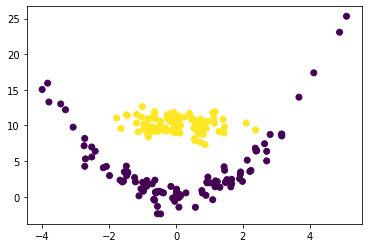

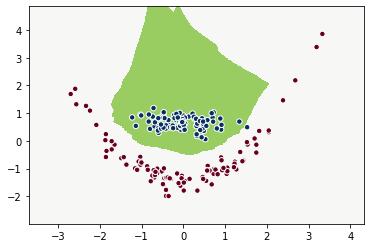

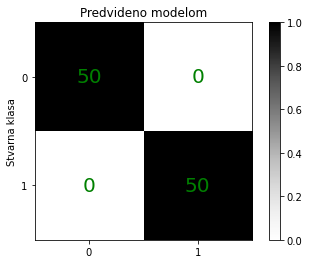

Accuracy: 1.0
Missclasification rate: 0.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [15]:
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN(KNN_model, X, y):
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
         
    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu',  edgecolor='white', label = 'train')


np.random.seed(242)
x1 = generate_data(200)
np.random.seed(12)
x2 = generate_data(100)


plt.figure()
plt.scatter(x1[:,0], x1[:,1], c=x1[:,2])


X_train_stand = scale(x1[:,0:2])
X_test_stand = scale(x2[:,0:2])
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_stand, x1[:,2])
predictionsKNN = model_knn.predict(X_test_stand)

plot_KNN(model_knn, X_train_stand, x1[:,2])

matrix_knn = confusion_matrix(x2[:,2], predictionsKNN)
plot_confusion_matrix(matrix_knn)
tn, fp, fn, tp = confusion_matrix(x2[:, 2], predictionsKNN).ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)
missclasification_rate = 1 - accuracy
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)

print('Accuracy:', str(accuracy))
print('Missclasification rate:', str(missclasification_rate))
print('Precision:', str(precision))
print('Recall:', str(recall))
print('Specificity:', str(specificity))
